### Key Regression Performance Metrics: MSE, MAE, RMSE
These metrics quantify how well a regression model’s predictions align with the actual target values. They are vital for model evaluation, error analysis, and comparative performance benchmarking.

### 1. 📉 Mean Squared Error (MSE)

| **Aspect**         | **Details**                                                                      |
| ------------------ | -------------------------------------------------------------------------------- |
| **Formula**        | $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$                    |
| **Interpretation** | Measures the average squared difference between actual and predicted values.     |
| **Sensitivity**    | Highly sensitive to **outliers** due to squaring of errors.                      |
| **Usage**          | Preferred when large errors are **particularly undesirable**.                    |
| **Unit**           | Square of the original unit (e.g., if target is in dollars, MSE is in dollars²). |


### 2. 📈 Mean Absolute Error (MAE)
| **Aspect**         | **Details**                                                                  |                   |   |
| ------------------ | ---------------------------------------------------------------------------- | ----------------- | - |
| **Formula**        | ( \text{MAE} = \frac{1}{n} \sum\_{i=1}^{n}                                   | y\_i - \hat{y}\_i | ) |
| **Interpretation** | Measures the average **magnitude** of errors, without considering direction. |                   |   |
| **Sensitivity**    | More **robust to outliers** compared to MSE.                                 |                   |   |
| **Usage**          | Suitable when **all errors are equally important**.                          |                   |   |
| **Unit**           | Same as the target variable (e.g., dollars, temperature).                    |                   |   |


### 3. 📐 Root Mean Squared Error (RMSE)
| **Aspect**         | **Details**                                                               |
| ------------------ | ------------------------------------------------------------------------- |
| **Formula**        | $\text{RMSE} = \sqrt{ \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 }$   |
| **Interpretation** | Square root of MSE; retains original units of the target variable.        |
| **Sensitivity**    | Like MSE, gives **higher penalty to large errors**.                       |
| **Usage**          | Commonly used for **interpretability** and **reporting to stakeholders**. |
| **Unit**           | Same as the target variable.                                              |


## Strategic Takeaways
| **Metric** | **When to Use**                                                                    |
| ---------- | ---------------------------------------------------------------------------------- |
| **MSE**    | Penalize large errors more harshly (e.g., financial forecasting, risk modeling)    |
| **MAE**    | Interpretability matters; robust to outliers (e.g., median house price prediction) |
| **RMSE**   | Balanced use-case with error in natural units; most commonly reported              |


In [1]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_true = [3, -0.5, 2, 7]
y_pred = [2.5, 0.0, 2, 8]

mse = mean_squared_error(y_true, y_pred)
mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mse)

print(f"MSE  = {mse:.4f}")
print(f"MAE  = {mae:.4f}")
print(f"RMSE = {rmse:.4f}")


MSE  = 0.3750
MAE  = 0.5000
RMSE = 0.6124


### Overfitting vs Underfitting – Executive Summary
Both overfitting and underfitting reflect a lack of generalization capability in a machine learning model. They arise due to imbalances between model complexity, training data representation, and learning capacity.

| **Aspect**                | **Overfitting**                                                               | **Underfitting**                                                |
| ------------------------- | ----------------------------------------------------------------------------- | --------------------------------------------------------------- |
| **Definition**            | Model captures **noise and patterns** in training data excessively            | Model fails to capture the **underlying pattern** in data       |
| **Model Complexity**      | Too **high** (e.g., too many parameters, deep architecture)                   | Too **low** (e.g., simple model, insufficient features)         |
| **Training Error**        | Very **low**                                                                  | **High**                                                        |
| **Validation/Test Error** | **High** (poor generalization)                                                | Also **high** (poor learning)                                   |
| **Behavior**              | Learns **training data too well**, including outliers and noise               | **Misses** relevant relationships in the data                   |
| **Visual Cue**            | Wiggly, overly complex curve in regression; near-perfect accuracy in training | Straight line failing to fit obvious trends                     |
| **Typical Cause**         | Overtraining, excessive capacity, lack of regularization                      | Insufficient training, too simplistic model, biased assumptions |


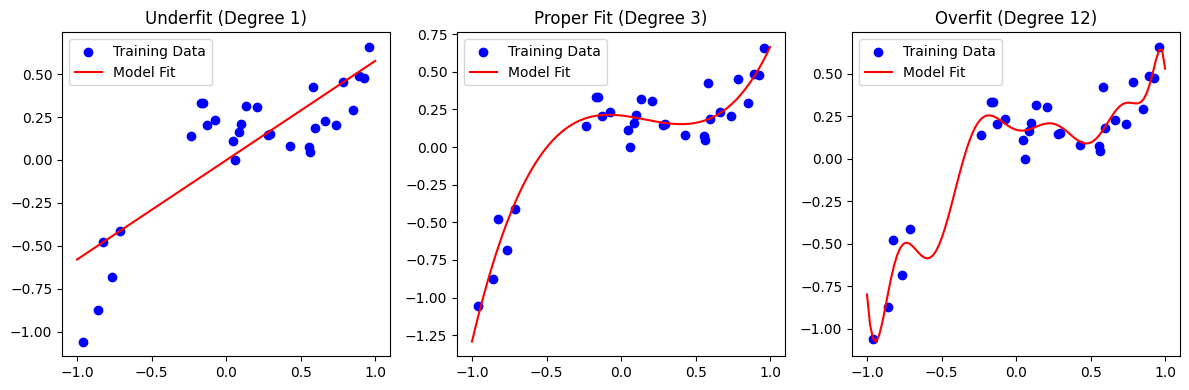

In [3]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
import numpy as np
import matplotlib.pyplot as plt

# Synthetic data
np.random.seed(0)
X = np.sort(np.random.rand(30, 1) * 2 - 1, axis=0)
y = X**3 - 0.5 * X**2 + 0.2 + np.random.normal(0, 0.1, X.shape)

# Models
models = {
    'Underfit (Degree 1)': make_pipeline(PolynomialFeatures(1), LinearRegression()),
    'Proper Fit (Degree 3)': make_pipeline(PolynomialFeatures(3), LinearRegression()),
    'Overfit (Degree 12)': make_pipeline(PolynomialFeatures(12), LinearRegression()),
}

# Plot
plt.figure(figsize=(12, 4))
for i, (title, model) in enumerate(models.items(), 1):
    model.fit(X, y)
    X_test = np.linspace(-1, 1, 100).reshape(-1, 1)
    y_pred = model.predict(X_test)
    plt.subplot(1, 3, i)
    plt.scatter(X, y, color='blue', label='Training Data')
    plt.plot(X_test, y_pred, color='red', label='Model Fit')
    plt.title(title)
    plt.legend()
plt.tight_layout()
plt.show()
